## **Iris Flower Classification Using ANN**
The goal of this project was to build a simple Artificial Neural Network (ANN) to classify iris flowers into three species using the famous Iris dataset.

✅ **ANN** is  made of neurons connected together that can learn from data

 🧱 **Structure**:



1.  Input Layer: Takes the input features (like petal size).

2. Hidden Layer(s): Does the thinking (math!).
1.   Output Layer: Gives the answer (what flower it is).

⚙️ **Activation Functions**: These are like switches that decide whether a neuron should “fire” or not.

Common ones:



1. ReLU (Rectified Linear Unit): “If input > 0, keep it; else, make it 0.”

1.  Sigmoid: Squishes number between 0 and 1.
2.  Tanh: Squishes between -1 and 1.
1.   Softmax: Used in output layer to pick the class with the highest probability.

🔁 Propagation:

Forward Propagation: Send the data through the network.

Backpropagation: Learn from mistakes by adjusting the weights.

🧪** Key Concepts**


1.   Weights: Like the strength of a connection between neurons.
2. Biases: A small number added to adjust the output.

1.   Learning Rate: How much we adjust weights at each step.
2.    Gradient Descent:
A method to find the best weights to reduce errors.


**Step 1: Import Libraries**

I have imported essential libraries for numerical computation (NumPy), data handling (Pandas), visualization (Matplotlib, Seaborn), and tools from Scikit-learn for preprocessing and dataset loading.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


**Step 2: Load the Dataset**

The Iris dataset is loaded directly from Scikit-learn. X contains the features and y contains the class labels (flower types).


In [ ]:
data = load_iris()
X = data.data  # Features: sepal length, width, petal length, width
y = data.target  # Labels: 0 = Setosa, 1 = Versicolor, 2 = Virginica

**Step 3: Split the Dataset**


the dataset is splitted into 80% training and 20% testing using train_test_split. random_state=42 ensures reproducibility.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


**Step 4: Standardize Features**

StandardScaler ensures all features are on the same scale, which improves the efficiency and accuracy of training.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step 5: One-Hot Encode Labels**

OneHotEncoder transforms class labels (0,1,2) into vectors like [1,0,0], [0,1,0], etc., suitable for multi-class classification.


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

**Step 6: Build the Model**

I have used Keras Sequential API. The model has one input layer (implicitly defined), one hidden layer (5 neurons, ReLU), and one output layer (3 neurons, Softmax).


In [ ]:
# Import the necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Build the model using Input()
model = Sequential()
model.add(Input(shape=(4,)))             # 4 features (input layer)
model.add(Dense(units=5, activation='relu'))    # Hidden layer with ReLU
model.add(Dense(units=3, activation='softmax')) # Output layer with 3 classes


**Step 7: Compile the Model**

The model is compiled with the SGD optimizer, categorical cross-entropy loss (good for one-hot labels), and tracked accuracy.


In [ ]:
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent (good for small datasets)
    loss='categorical_crossentropy',  # For multi-class classification + one-hot labels
    metrics=['accuracy']
)

**Step 8: Train the Model**

The model is trained using .fit() for 100 epochs, and it also evaluates validation performance using the test set.


In [ ]:
# Training the model on training data for 100 epochs
history = model.fit(
    X_train, y_train,        # The training data
    epochs=100,              # Number of learning loops
    validation_data=(X_test, y_test),  # Check on test data while training
    verbose=1                # progress bar
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9019 - loss: 0.4295 - val_accuracy: 0.9000 - val_loss: 0.3471
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9112 - loss: 0.3956 - val_accuracy: 0.9000 - val_loss: 0.3452
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9144 - loss: 0.4041 - val_accuracy: 0.9000 - val_loss: 0.3434
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9040 - loss: 0.4344 - val_accuracy: 0.9000 - val_loss: 0.3415
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9042 - loss: 0.4320 - val_accuracy: 0.9000 - val_loss: 0.3398
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9427 - loss: 0.3914 - val_accuracy: 0.9333 - val_loss: 0.3380
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9146 - loss: 0.4071 - val_accuracy: 0.9333 - val_loss: 0.3363
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9250 - loss: 0.3771 - val_accuracy: 0.9333 - val_loss:

**Step 9: Evaluate the Model**

I have used model.predict() to get outputs, convert softmax outputs to class labels using argmax, and calculate accuracy and confusion matrix.


In [ ]:
# Getting probabilities of prediction
y_pred_probs = model.predict(X_test)

# Converting probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Pick highest probability
y_true = np.argmax(y_test, axis=1)        # Convert one-hot back to labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Evaluate Using Accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Visuvalize the confusion matrix

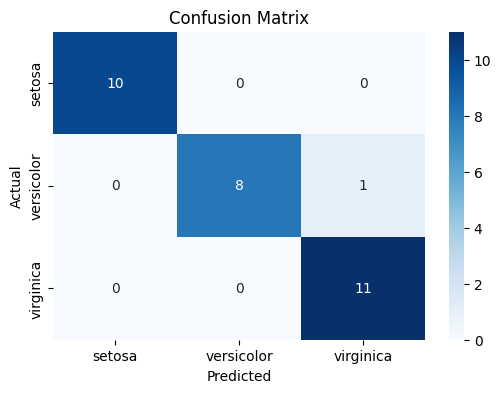

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Step 10: Visualize Performance**

I plotted training vs validation loss and accuracy over the epochs to analyze the learning progress of the model.


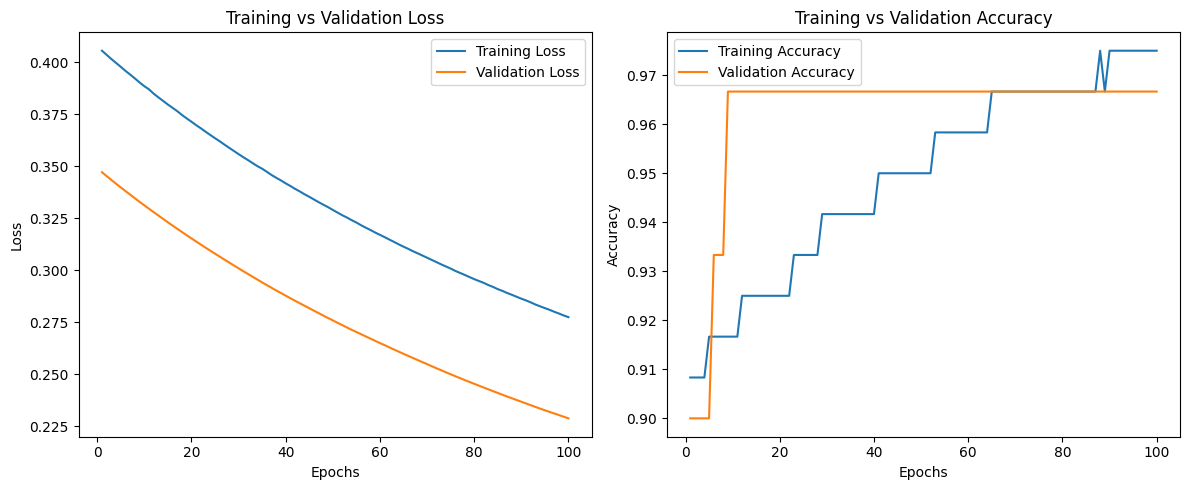

In [ ]:
# Plotting training & validation loss and accuracy
import matplotlib.pyplot as plt

# Extracting training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#**Insights**
- The model successfully learned to classify iris species with high accuracy.

- Loss and accuracy plots showed steady improvement without overfitting.
- The confusion matrix confirmed strong class separation.



#**Curve Behavior -What it means**

- Loss decreases	- The model is learning

- Accuracy increases	- The model is getting better at classifying

- Val & Train curves close	Good generalization (not overfitting!)